# Thompson Sampling with Soft Constraints: 
# Finite-Time Analysis and Regret Bounds

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Load Data

In [3]:
data = np.load('results/edX_eta0.50_T1000_N4.npy', allow_pickle=True)[()]

T = data['T']
target_success_prob = data['constraint']

oracle_avg_reward        = np.mean( data['oracle_reward_values'], axis=0 )
lincon_kl_ucb_avg_reward = np.mean( data['lincon_kl_ucb_reward_values'], axis=0 )
lincon_ts_avg_reward     = np.mean( data['lincon_ts_reward_values'], axis=0 )

oracle_avg_success        = np.mean( data['oracle_reward_events'], axis=0 )
lincon_kl_ucb_avg_success = np.mean( data['lincon_kl_ucb_reward_events'], axis=0 )
lincon_ts_avg_success     = np.mean( data['lincon_ts_reward_events'], axis=0 )

In [4]:
oracle_cum_reward        = np.cumsum( oracle_avg_reward )
lincon_kl_ucb_cum_reward = np.cumsum( lincon_kl_ucb_avg_reward )
lincon_ts_cum_reward     = np.cumsum( lincon_ts_avg_reward )

cum_constraint = target_success_prob * np.arange( 0, T, 1)

oracle_cum_violation        = np.maximum( 0.0, cum_constraint - np.cumsum( oracle_avg_success ) )
lincon_kl_ucb_cum_violation = np.maximum( 0.0, cum_constraint - np.cumsum( lincon_kl_ucb_avg_success ) )
lincon_ts_cum_violation     = np.maximum( 0.0, cum_constraint - np.cumsum( lincon_ts_avg_success ) )

lincon_kl_ucb_cum_regret = np.maximum(0.0, oracle_cum_reward - lincon_kl_ucb_cum_reward)
lincon_ts_cum_regret     = np.maximum(0.0, oracle_cum_reward - lincon_ts_cum_reward)

sampling_interval = 1#int( T / 10 )

# Plot Results

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


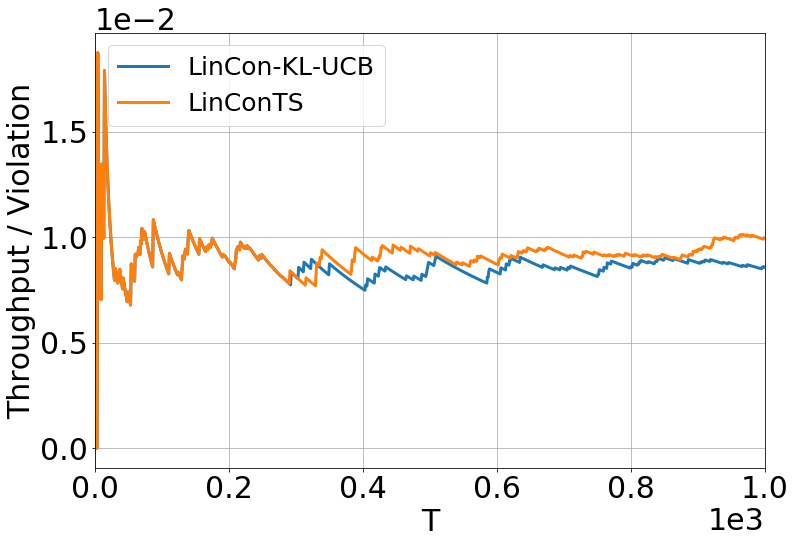

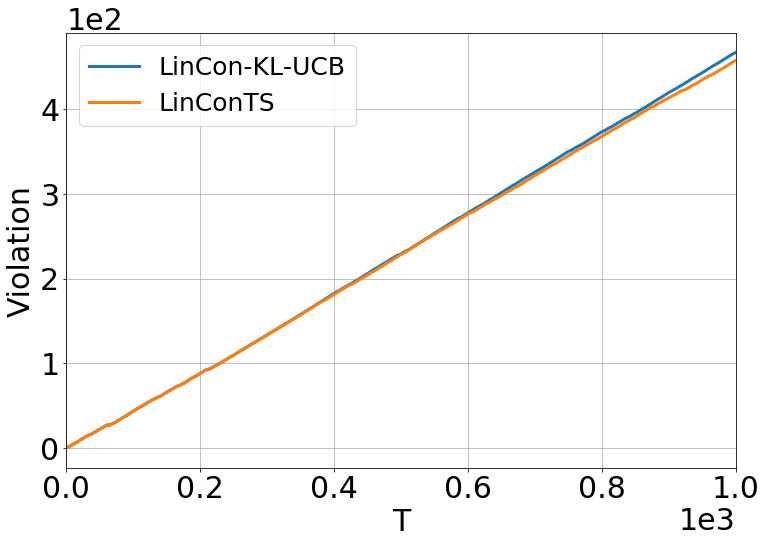

In [5]:
plt.rcParams.update({'font.size': 30, 
                     'lines.linewidth' : 3,
                     'lines.markersize': 20})

#------------------------------------
# Cum. Reward / Cum. Violation
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])

offset = 0
x_ticks = np.arange(offset, T)
samples = np.arange(0, T, sampling_interval)

plt.plot(x_ticks[samples], np.divide( lincon_kl_ucb_cum_reward[offset:], lincon_kl_ucb_cum_violation[offset:])[samples])
plt.plot(x_ticks[samples], np.divide( lincon_ts_cum_reward[offset:], lincon_ts_cum_violation[offset:])[samples])

plt.legend(['LinCon-KL-UCB', 'LinConTS'], loc='upper left', fontsize=25)
plt.xlabel('T')
plt.ylabel('Throughput / Violation')

plt.show()

#------------------------------------
# Cum. Violation
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])
#plt.ylim([0, 5000])

x_ticks = np.arange(0, T)
samples = np.arange(0, T, sampling_interval)

plt.plot(x_ticks[samples], lincon_kl_ucb_cum_violation[samples])#, 'k-^')
plt.plot(x_ticks[samples], lincon_ts_cum_violation[samples])#, 'k-s')

plt.legend(['LinCon-KL-UCB', 'LinConTS'], loc='upper left', fontsize=25)
plt.xlabel('T')
plt.ylabel('Violation')

plt.show()

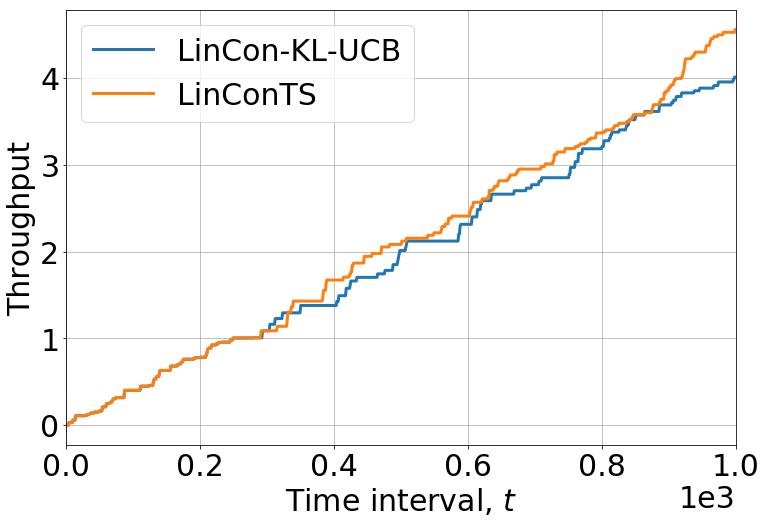

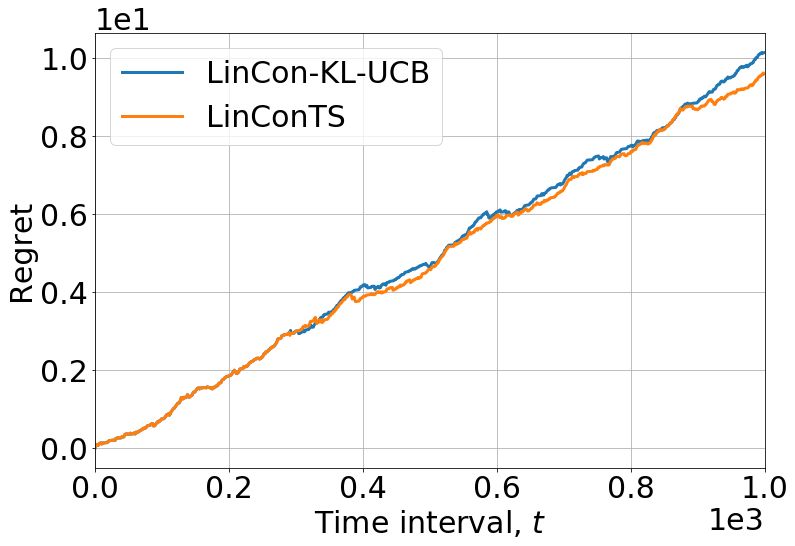

In [6]:
#------------------------------------
# Cum. Reward
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])
#plt.ylim([0, 2000])

x_ticks = np.arange(0, T)
samples = np.arange(0, T, sampling_interval)

#plt.plot(x_ticks[samples], con_ucb_cum_reward[samples], 'k-v')
plt.plot(x_ticks[samples], lincon_kl_ucb_cum_reward[samples])#, 'k-^')
plt.plot(x_ticks[samples], lincon_ts_cum_reward[samples])#, 'k-s')

plt.legend(['LinCon-KL-UCB', 'LinConTS'], loc='upper left')
plt.xlabel('Time interval, $t$')
plt.ylabel('Throughput')

plt.show()

#------------------------------------
# Cum. Regret
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])
#plt.ylim([0, 2000])

x_ticks = np.arange(0, T)
samples = np.arange(0, T, sampling_interval)

plt.plot(x_ticks[samples], lincon_kl_ucb_cum_regret[samples])#, 'k-^')
plt.plot(x_ticks[samples], lincon_ts_cum_regret[samples])#, 'k-s')

plt.legend(['LinCon-KL-UCB', 'LinConTS'], loc='upper left')
plt.xlabel('Time interval, $t$')
plt.ylabel('Regret')

plt.show()